In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender']) ##REMEMBER MALE = 1, FEMALE 0

In [12]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [13]:
df[['Annual Income (k$)','Spending Score (1-100)']]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [29]:
k = range(1, 10)
inertia = []

for i in k:
    model = KMeans(n_clusters = i) # jumlah cluster akan dilooping dalam range (1 - 10)
    model.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia.append(model.inertia_)

print(k)
print(inertia)

range(1, 10)
[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30227.606513152015, 25028.02047526941, 21900.341350107527]


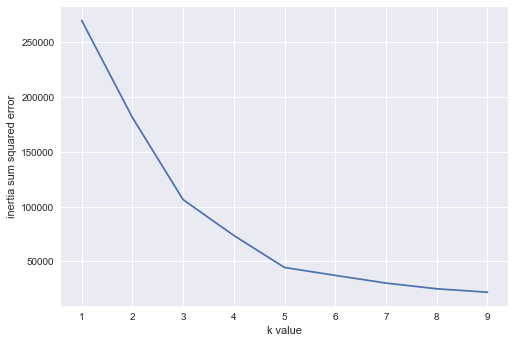

In [30]:
plt.plot(k, inertia) # untuk melihat pada sikut dalam plot
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.show()

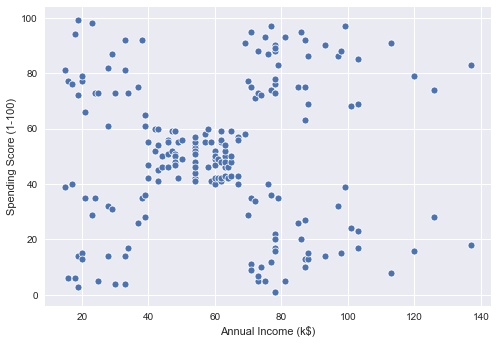

In [31]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)') #k bisa ditentukan dengan melihat plotting dan menggunakan instinct

In [20]:
model = KMeans(n_clusters = 5, max_iter = 10000)

In [22]:
df['cluster'] = model.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

In [ ]:
model.cluster_centers_

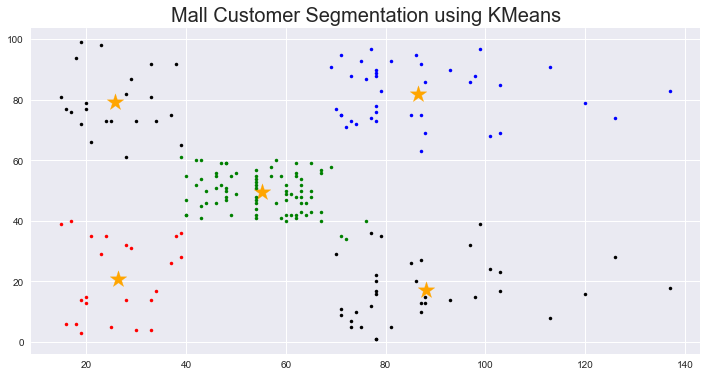

In [26]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 6))
plt.scatter(
    model.cluster_centers_[:, 0],
    model.cluster_centers_[:, 1],
    color = 'orange', marker = '*', s = 300
)
plt.plot(df['Annual Income (k$)'][df['cluster'] == 0], df['Spending Score (1-100)'][df['cluster'] == 0], 'g.')
plt.plot(df['Annual Income (k$)'][df['cluster'] == 1], df['Spending Score (1-100)'][df['cluster'] == 1], 'b.')
plt.plot(df['Annual Income (k$)'][df['cluster'] == 2], df['Spending Score (1-100)'][df['cluster'] == 2], 'r.')
plt.plot(df['Annual Income (k$)'][df['cluster'] == 3], df['Spending Score (1-100)'][df['cluster'] == 3], 'k.')
plt.plot(df['Annual Income (k$)'][df['cluster'] == 4], df['Spending Score (1-100)'][df['cluster'] == 4], 'k.')
plt.grid(True)
plt.title("Mall Customer Segmentation using KMeans", size=20)
plt.show()